<a href="https://colab.research.google.com/github/Isha2906/Datasets/blob/main/911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
df= pd.read_csv('/content/911.csv')

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [ ]:
df.isnull().sum()

lat             0
lng             0
desc            0
zip          3531
title           0
timeStamp       0
twp             8
addr            1
e               1
dtype: int64

In [ ]:
df['title'].nunique()

91

In [ ]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -           6789
Traffic: DISABLED VEHICLE -           2707
Fire: FIRE ALARM                      1543
EMS: RESPIRATORY EMERGENCY            1530
EMS: CARDIAC EMERGENCY                1419
                                      ... 
Fire: UNKNOWN MEDICAL EMERGENCY          1
EMS: UNKNOWN TYPE FIRE                   1
Fire: RESCUE - TECHNICAL                 1
Fire: MEDICAL ALERT ALARM                1
Fire: HAZARDOUS MATERIALS INCIDENT       1
Name: title, Length: 91, dtype: int64

In [ ]:
#Since only one null value in title column dropping the corressponding row
df.dropna(axis = 0 , subset = ['title'], inplace = True)


In [ ]:
df.isnull().sum()

lat             0
lng             0
desc            0
zip          3531
title           0
timeStamp       0
twp             8
addr            1
e               1
dtype: int64

In [ ]:
#Extracting the primary reason of dialing 911
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])


In [ ]:
df['Reason'].value_counts

<bound method IndexOpsMixin.value_counts of 0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
28311    Traffic
28312       Fire
28313        EMS
28314        EMS
28315        EMS
Name: Reason, Length: 28316, dtype: object>

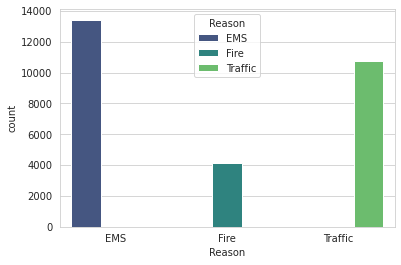

In [ ]:
sns.countplot(x='Reason',data = df,hue='Reason',palette='viridis')

##Emergency Medical Services is the reason with highest frequency to dial 911

In [ ]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason'],
      dtype='object')

In [ ]:
type(df['timeStamp'].iloc[0])

str

In [ ]:
#the data type is string. Converting the time stamp column to datetime format to extract the individual attributes

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


In [ ]:
df.drop(columns='timeStamp',inplace=False)

,lat,lng,desc,zip,title,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1.0,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28311,40.168538,-75.498200,BLACK ROCK RD & S TRAPPE RD; UPPER PROVIDENCE;...,19468.0,Traffic: VEHICLE ACCIDENT -,UPPER PROVIDENCE,BLACK ROCK RD & S TRAPPE RD,1.0,Traffic,15,2,4
28312,40.152189,-75.480512,BLACK ROCK RD; UPPER PROVIDENCE; 2016-02-19 @ ...,NaN,Fire: VEHICLE ACCIDENT,UPPER PROVIDENCE,BLACK ROCK RD,1.0,Fire,15,2,4
28313,40.152189,-75.480512,BLACK ROCK RD; UPPER PROVIDENCE; Station 324;...,NaN,EMS: VEHICLE ACCIDENT,UPPER PROVIDENCE,BLACK ROCK RD,1.0,EMS,15,2,4
28314,40.119605,-75.284900,GERMANTOWN PIKE & ATRIUM WAY; PLYMOUTH; Stati...,19462.0,EMS: OVERDOSE,PLYMOUTH,GERMANTOWN PIKE & ATRIUM WAY,1.0,EMS,15,2,4


In [ ]:
df['Hour']

0        17
1        17
2        14
3        16
4        16
         ..
28311    15
28312    15
28313    15
28314    15
28315    15
Name: Hour, Length: 28316, dtype: int64

In [ ]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
28311     2
28312     2
28313     2
28314     2
28315     2
Name: Month, Length: 28316, dtype: int64

In [ ]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
28311    4
28312    4
28313    4
28314    4
28315    4
Name: Day of Week, Length: 28316, dtype: int64

In [ ]:
#The days of the week are given in numerical values starting from 0
#Creating a dictionary to map the numeric values ith the corresponding days
dmap={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [ ]:
df['Day of Week']=df['Day of Week'].map(dmap)

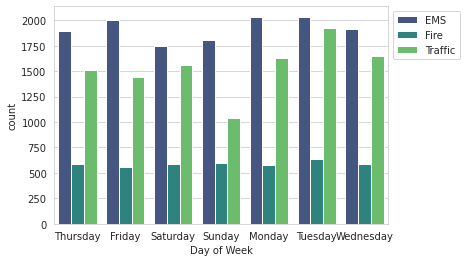

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
#Adjusting the position of legend box
plt.legend(bbox_to_anchor=(1,1),loc=2)


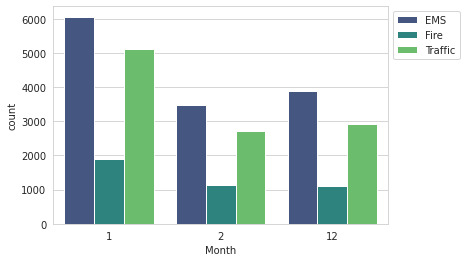

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
#Adjusting the position of legend box
plt.legend(bbox_to_anchor=(1,1),loc=2)



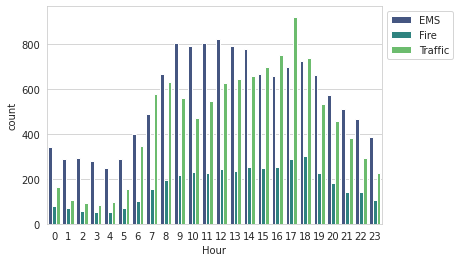

In [ ]:
sns.countplot(x='Hour',data=df,hue='Reason',palette='viridis')
#Adjusting the position of legend box
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.rcParams["figure.figsize"] = (100,3)



In [ ]:
bymonth=df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
2,7304,7304,7304,6371,7304,7304,7303,7303,7303,7304,7304,7304
12,7916,7916,7916,6902,7916,7916,7911,7916,7916,7916,7916,7916


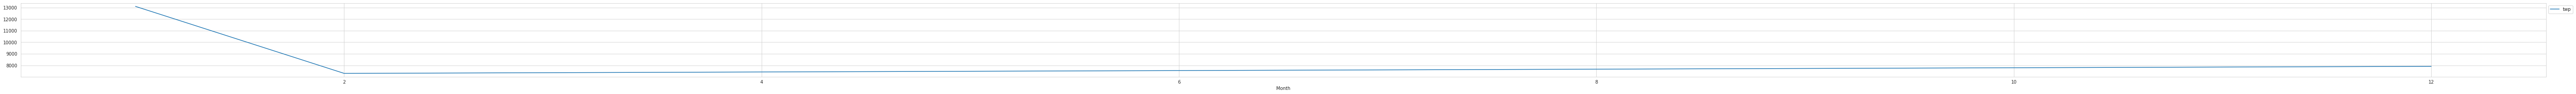

In [ ]:
 bymonth['twp'].plot()
 plt.rcParams["figure.figsize"] = (15,13)
 #Adjusting the position of legend box
plt.legend(bbox_to_anchor=(1,1),loc=2)

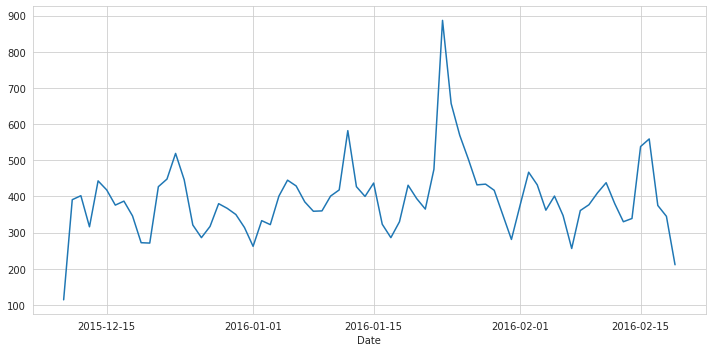

In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,3)

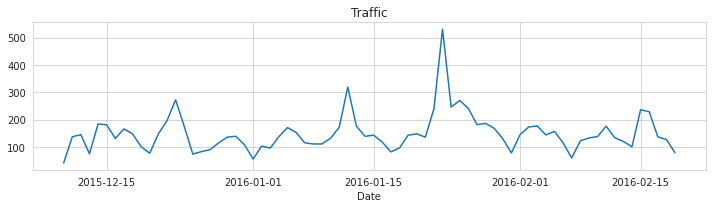

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,3)

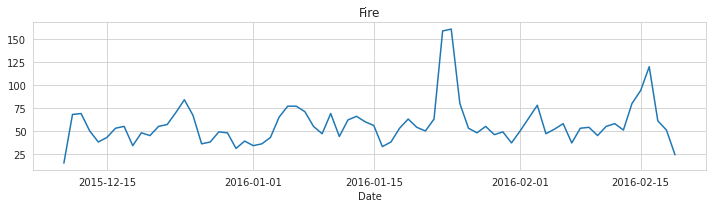

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,3)

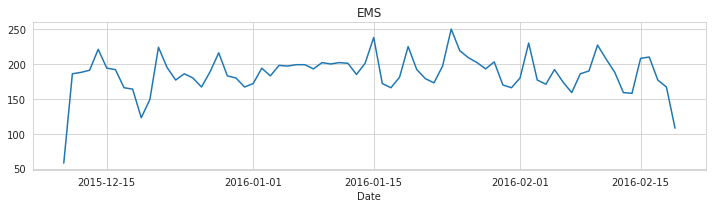

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,3)

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

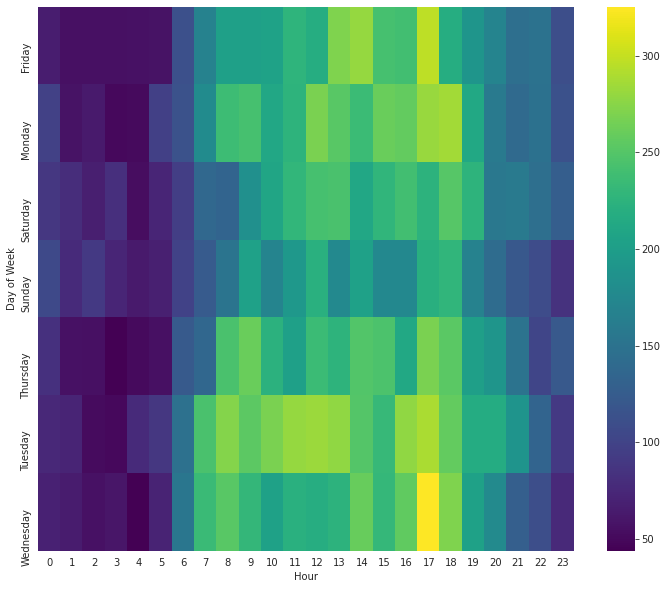

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dayHour,cmap='viridis')